In [1]:
# put last constants to config.yml from both classes
# have a plot of CEN over map for github page: made manually + the orography plot from below
# create github repo + readme

## Application of causal discovery and casual inference methods to climate dynamics problem
##### Here, this notebook shows and explains step by step a causal approach to analyse linkages among ENSO, circulation fields, and summer monsoon precipitation over the Himalayas.

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

from src.DataProcessingClass import DataProcessingClass
from src.CausalityClass import CausalityClass

#### Preprocessing of climate indices (or time series data): 
#### ENSO - El Niño–Southern Oscillation
#### WC - Walker cell
#### MHC - Monsoon Hadley cell
#### Himalayan precipitation

In [3]:
# Create a class instance for data preprocessing
dpc = DataProcessingClass()

# Load climate indices from netCDF files.
D = dpc.load_netcdf_files()

Input dir path: data/data_renamed/
Selected indices:  ['enso', 'mhc', 'precip', 'wc']
0 enso.nc
1 mhc.nc
2 precip.nc
3 wc.nc


#### Plot the location of the WC/HP and MHC indices

da <xarray.Dataset>
Dimensions:    (time: 1, latitude: 221, longitude: 361)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -4.5 -4.75 -5.0
  * longitude  (longitude) float32 45.0 45.25 45.5 45.75 ... 134.5 134.8 135.0
Data variables:
    orog       (time, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.5


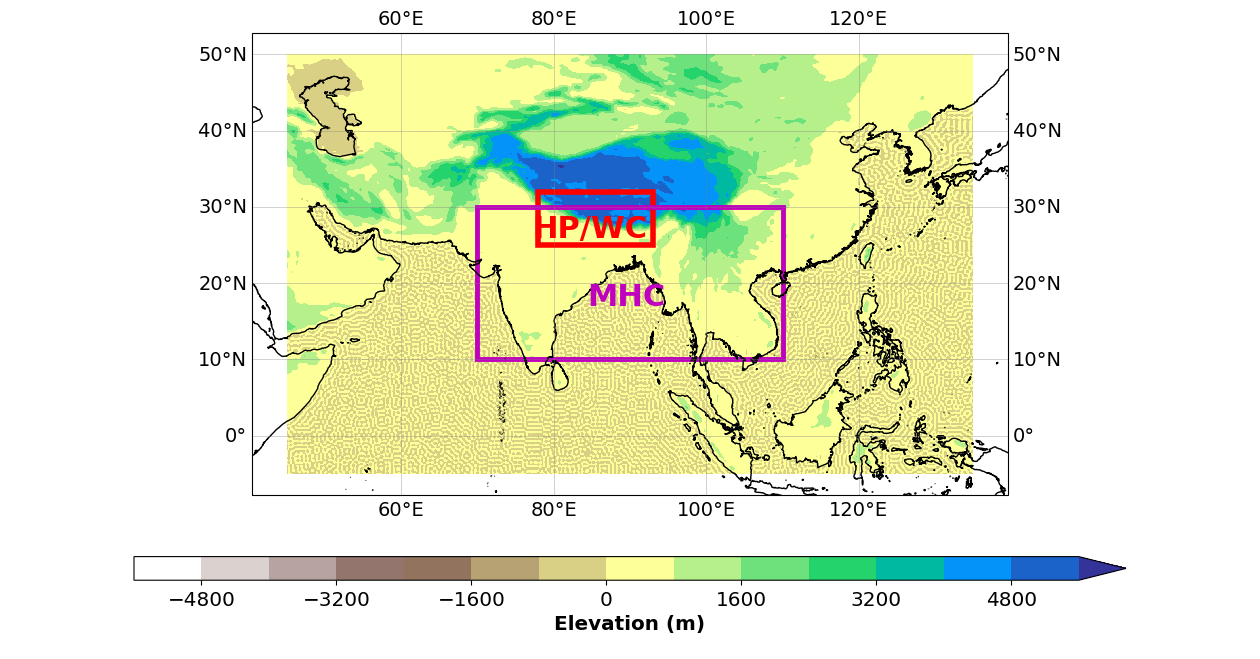

In [4]:
dpc.plot_indices_over_orography()

#### Transfrom precipitation data with logarithmic function

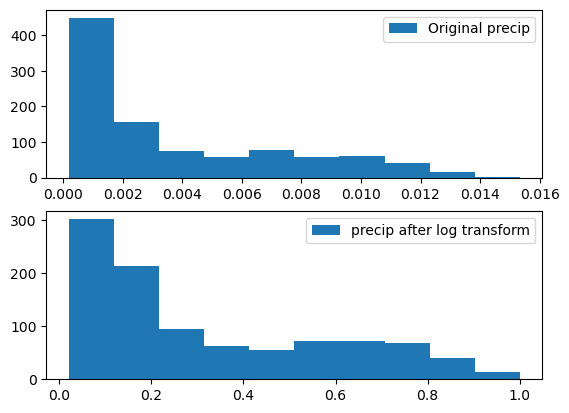

In [5]:
# Apply log transform
dpc.transform_precip(D, ind_name='precip', apply_transform=True)

#### Apply ADF and KPSS statistical tests to indices to check for the stationarity 

In [6]:
# Use the Augmented Dickey-Fuller unit root test and Kwiatkowski-Phillips-Schmidt-Shin test for stationarity
dpc.adf_kpss_tests(D)

Index: enso
Significance level: 0.05
ADF test: test statistics; p-value:  -7.065785772885115 5.085032990994129e-10
KPSS test: test statistics; p-value:  0.07138192512351936 0.1
Yes, the index is stationary.

Index: mhc
Significance level: 0.05
ADF test: test statistics; p-value:  -6.764301743988442 2.7418971521246714e-09
KPSS test: test statistics; p-value:  0.20256524111057098 0.1
Yes, the index is stationary.

Index: precip
Significance level: 0.05
ADF test: test statistics; p-value:  -5.087714502108937 1.483873363800904e-05
KPSS test: test statistics; p-value:  0.2821750549338365 0.1
Yes, the index is stationary.

Index: wc
No, the index is not stationary.



/Users/muszynski/opt/anaconda3/envs/causanal2/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/muszynski/opt/anaconda3/envs/causanal2/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/muszynski/opt/anaconda3/envs/causanal2/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/muszynski/opt/anaconda3/envs/causanal2/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: Interpolatio

#### 1) Based on the result of statitiscal test perform detrending of WC index
#### 2) Remove climatological and seasonal cycles
#### 3) Normalise indices to a common range
#### 4) Select datapoint from climate indices from a specified timeframe of our interest

In [7]:
# Select index
ind_name = 'wc'

dpc.detrend_index(D, ind_name)

# Remove means
dpc.remove_means(D)

# Apply min max normalisation
dpc.min_max_norm(D)

# Select datapoint for May-September from each year for 1940-2022
dpc.select_datapoints(D)


#### Calculate lagged cross-correlations for all pairs of climate indices

In [8]:
# Choose max lag time
n_lags = -2

dpc.test_pairs_lag_corr(D, n_lags)

Pair: enso-->mhc
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0 PearsonRResult(statistic=-0.16745723919992023, pvalue=0.000614141046376721)
-1 PearsonRResult(statistic=-0.1222119742054426, pvalue=0.012829700722352795)
-2 PearsonRResult(statistic=0.0393378912173375, pvalue=0.4252616733350374)


Pair: enso-->precip
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0 PearsonRResult(statistic=-0.12025727692182964, pvalue=0.014232547925402414)
-1 PearsonRResult(statistic=-0.1513678594610773, pvalue=0.002012496404817756)
-2 PearsonRResult(statistic=0.023379627040393945, pvalue=0.6356747156730398)


Pair: enso-->wc
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0 PearsonRResult(statistic=0.16268288245577886, pvalue=0.0008800994308264524)
-1 PearsonRResult(statistic=0.13397712123387462, pvalue=0.006331368903649186)
-2 PearsonRResult(statistic=0.02953527732819818, pvalue=0.5494802457821705)


Pair: mhc-->enso
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0 Pe

#### Build a causal graph using PCMCI algorithm.

Input Indices: (415, 4)
Dataframe size: (415, 4)

## Significant links at alpha = 0.05:

    Variable enso has 1 link(s):
        (enso -1): pval = 0.02798 | qval = 0.04476 | val =  0.108

    Variable mhc has 3 link(s):
        (wc -1): pval = 0.00029 | qval = 0.00129 | val = -0.178
        (precip -1): pval = 0.00032 | qval = 0.00129 | val = -0.178
        (mhc -1): pval = 0.01105 | qval = 0.02210 | val =  0.126

    Variable precip has 4 link(s):
        (precip -1): pval = 0.00000 | qval = 0.00000 | val = -0.286
        (wc -1): pval = 0.00019 | qval = 0.00129 | val = -0.184
        (enso -1): pval = 0.00513 | qval = 0.01643 | val = -0.138
        (mhc -1): pval = 0.00730 | qval = 0.01668 | val =  0.133

    Variable wc has 2 link(s):
        (mhc -1): pval = 0.00708 | qval = 0.01668 | val = -0.133
        (enso -1): pval = 0.02296 | qval = 0.04081 | val =  0.112


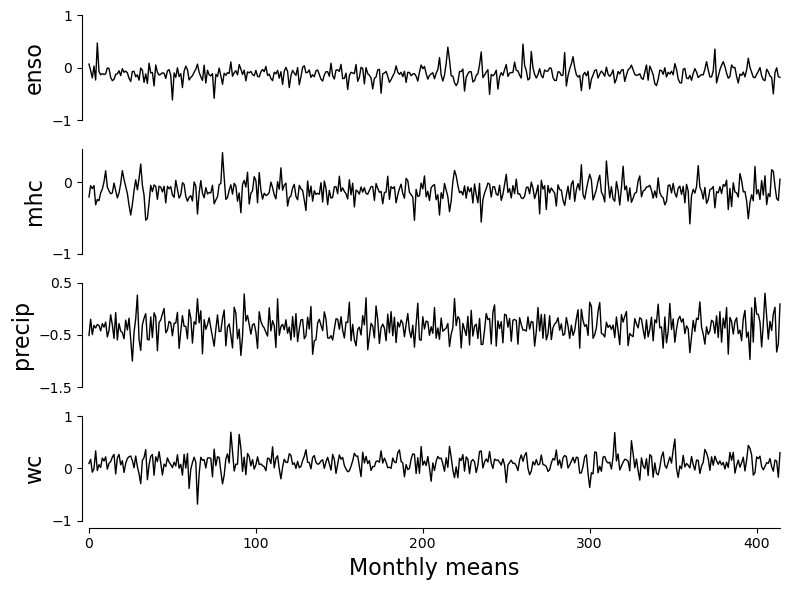

In [9]:
# Create a class instance with climate indices
ca = CausalityClass(D)

# Construct a custom dataframe format used by Tigramite package
dataframe, var_names = ca.generate_dataframe(D) 

ca.plot_time_series(dataframe)

# Build the causal graph with PCMCI algorithm
sig_causal_parents = ca.construct_causal_graph(dataframe)

#### Use linear estimator to compute beta coefficients on the build causal graph

In [10]:
# Fit the linear estimator
val_matrix, link_matrix = ca.linear_estimator(sig_causal_parents, dataframe)

# Get the beta coefficients for the causal graph
ca.get_links_beta_coeffs()


### Beta coefficients for:

0 enso
1 mhc
2 precip
3 wc
             0         1         2         3
0 -1  0.099544  0.000000 -0.228910  0.135563
3 -1  0.000000 -0.163724 -0.263894  0.000000
2 -1  0.000000 -0.122885 -0.286712  0.000000
1 -1  0.000000  0.139660  0.269170 -0.135812


#### Plot the causal graph a causal effect network 

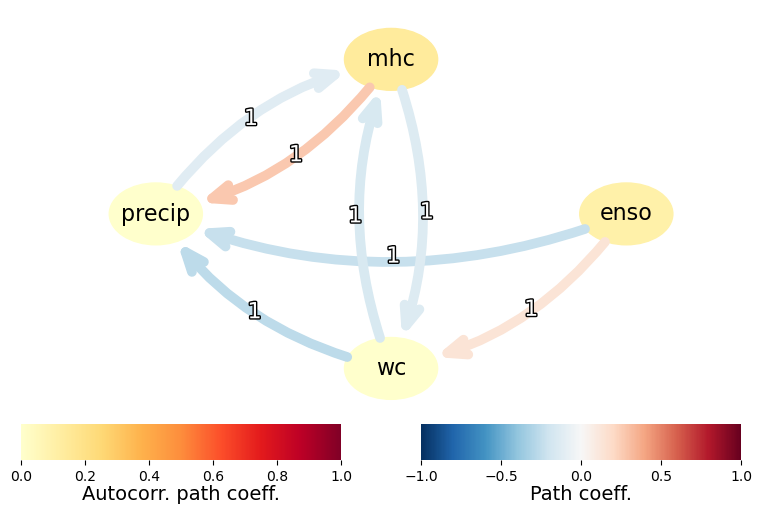

In [11]:
# Plot causal effect network and save it to a png format
ca.plot_cens_graph(val_matrix, link_matrix, save=True)

#### Apply bootstrapping to estimate the statisical robustness of the causal links

In [12]:
# Run bootstrap procedure, compute the aggregated causal metrics: average causal effect and average causal susceptiblity.
# Save the results of the procedure to a npz file
ca.bootrstapping()

Sample size: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410]
Selected samples/years: [185 170 370  10 110 115 235  35 295 295]
Input Indices: (415, 4)
Dataframe size: (415, 4)
Selected months: [185, 186, 187, 188, 189]
dataframe: (415, 4)
New dataframe: (410, 4)

## Significant links at alpha = 0.05:

    Variable enso has 0 link(s):

    Variable mhc has 3 link(s):
        (wc -1): pval = 0.00031 | qval = 0.00127 | val = -0.179
        (precip -1): pval = 0.00032 | qval = 0.00127 | val = -0.179
        (mhc -1): pval = 0.01324 | qval = 0.02649 | val =  0.124

    Variable precip has 4 link(s):
        (precip -1): pval = 0.00000 | qval = 0.00000